In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

In [2]:
df = pd.read_csv('kc_house_data.csv')

In [3]:
df.price.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [4]:
df.loc[:,'log_price'] = np.log(df.price)

In [5]:
df.log_price.head()

0    12.309982
1    13.195614
2    12.100712
3    13.311329
4    13.142166
Name: log_price, dtype: float64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
log_price        21597 non-null float64
dtypes: float64(9), int64(11), obje

In [7]:
df.sqft_basement.value_counts().head()

0.0      12826
?          454
600.0      217
500.0      209
700.0      208
Name: sqft_basement, dtype: int64

In [8]:
'''replace question marks with median???'''

'replace question marks with median???'

In [9]:
df.sqft_basement.replace(to_replace='?', value=np.nan, inplace=True)

In [10]:
df.sqft_basement.median()

0.0

In [11]:
df.sqft_basement.replace(to_replace=np.nan, value=df.sqft_basement.median(), inplace=True)

In [12]:
df.sqft_basement = df.sqft_basement.astype('float64')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
log_price        21597 non-null float64
dtypes: float64(10), int64(11), ob

In [14]:
df.corr().price[2:]

bedrooms         0.308787
bathrooms        0.525906
sqft_living      0.701917
sqft_lot         0.089876
floors           0.256804
waterfront       0.276295
view             0.395734
condition        0.036056
grade            0.667951
sqft_above       0.605368
sqft_basement    0.321108
yr_built         0.053953
yr_renovated     0.129599
zipcode         -0.053402
lat              0.306692
long             0.022036
sqft_living15    0.585241
sqft_lot15       0.082845
log_price        0.891745
Name: price, dtype: float64

In [269]:
df.corr().log_price[2:]

bedrooms         0.343360
bathrooms        0.551249
sqft_living      0.695185
sqft_lot         0.100025
floors           0.310630
waterfront       0.180524
view             0.345466
condition        0.038918
grade            0.703720
sqft_above       0.601579
sqft_basement    0.313119
yr_built         0.080583
yr_renovated     0.118174
zipcode         -0.038788
lat              0.448837
long             0.050862
sqft_living15    0.619326
sqft_lot15       0.092281
log_price        1.000000
Name: log_price, dtype: float64

In [270]:
df.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [271]:
df.bathrooms.value_counts()

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

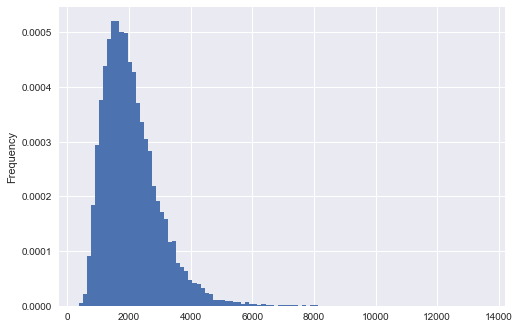

In [272]:
df.sqft_living.plot(kind='hist', density=True, bins=100)

In [273]:
df['sqft_living_log'] = np.log(df.sqft_living)

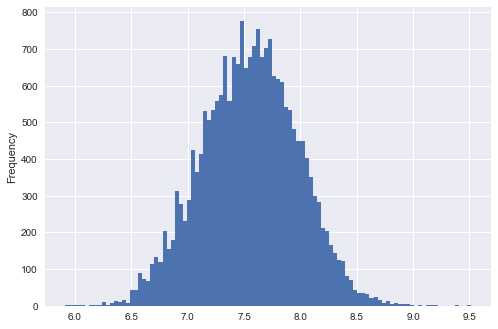

In [274]:
df.sqft_living_log.plot(kind='hist',bins=100)

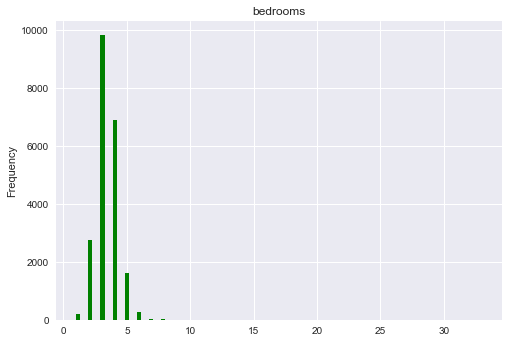

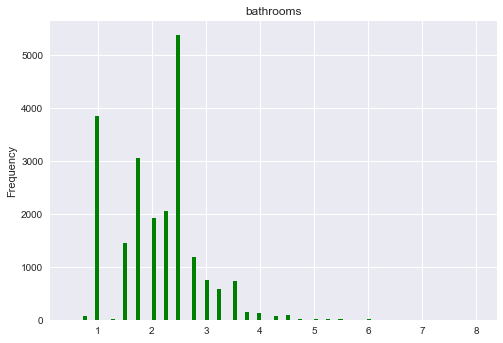

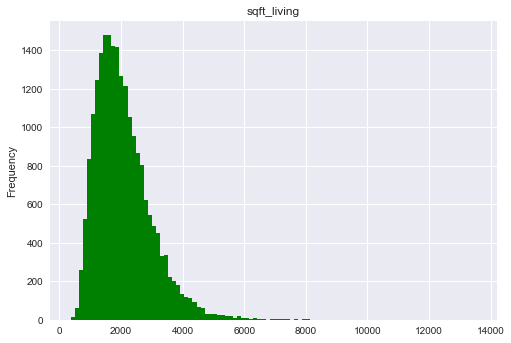

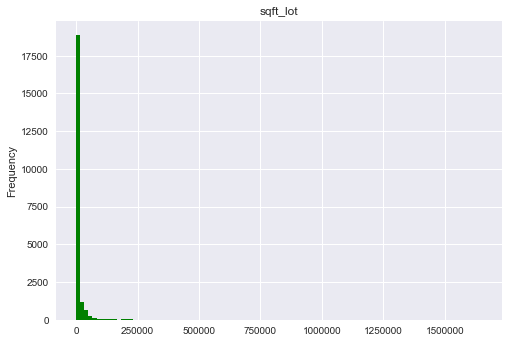

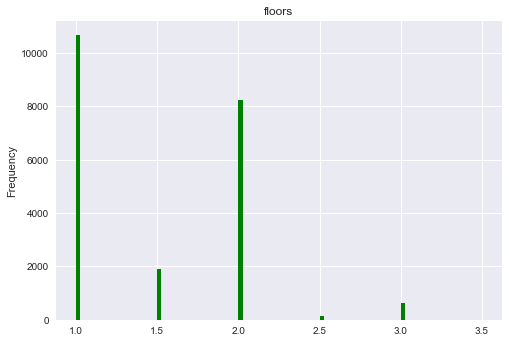

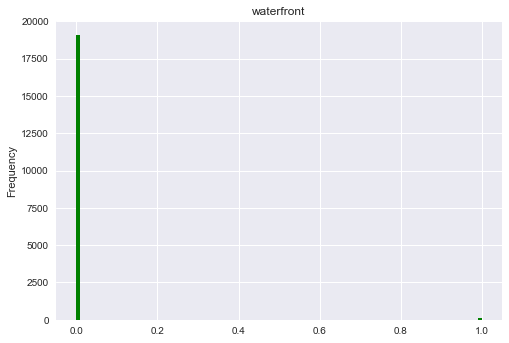

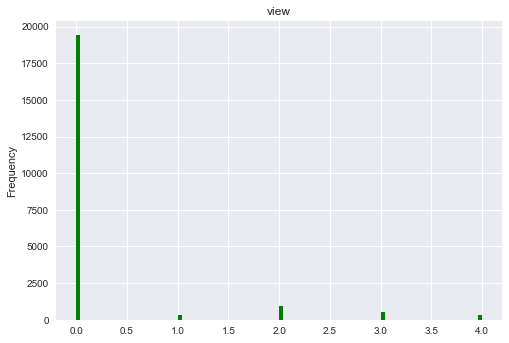

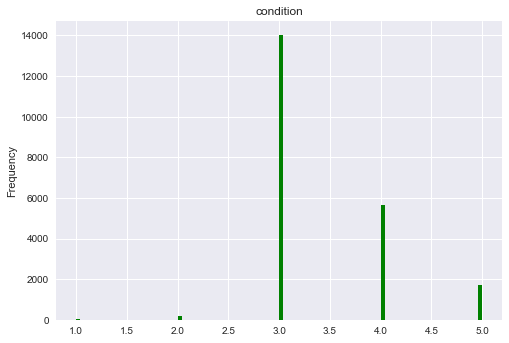

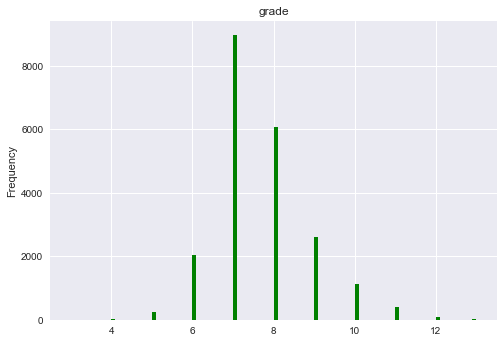

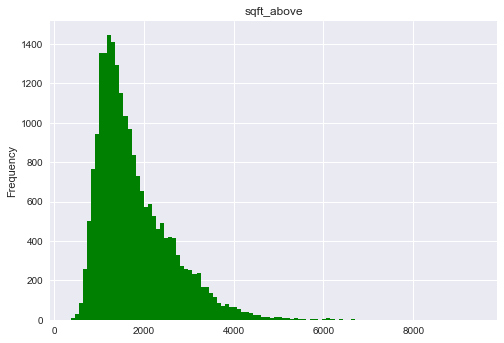

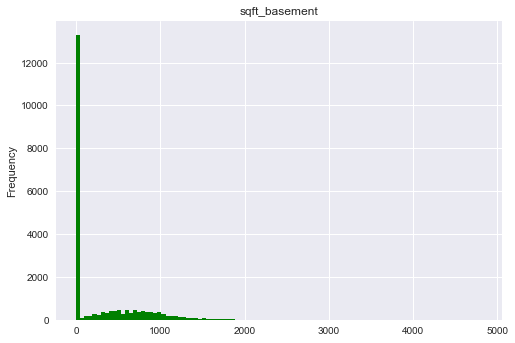

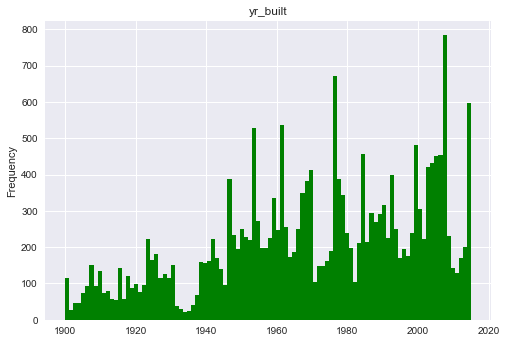

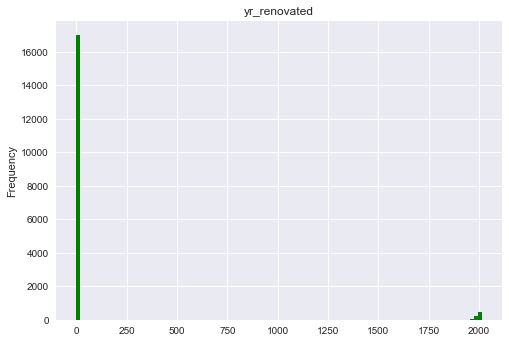

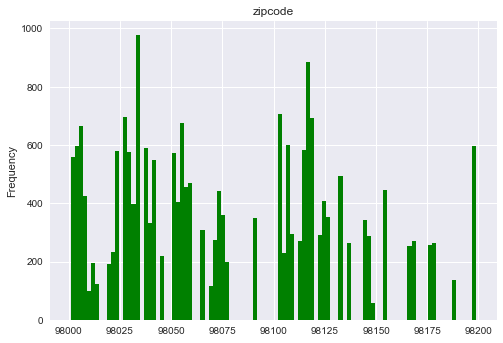

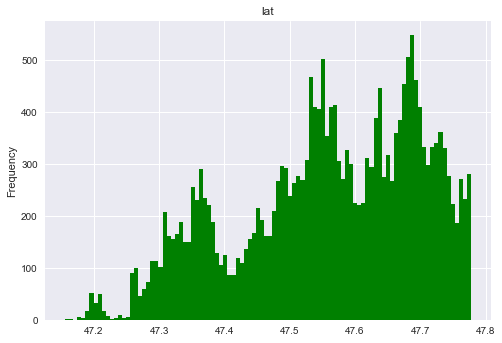

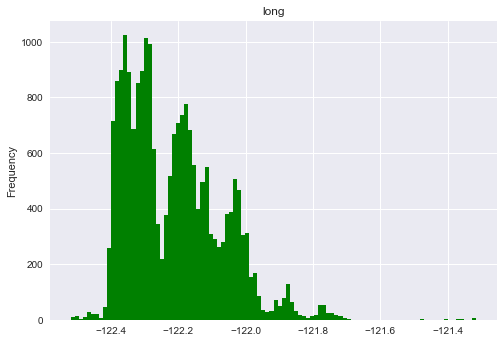

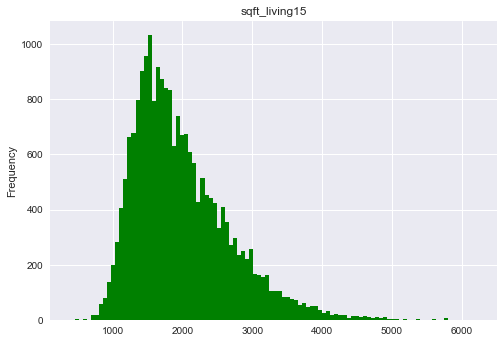

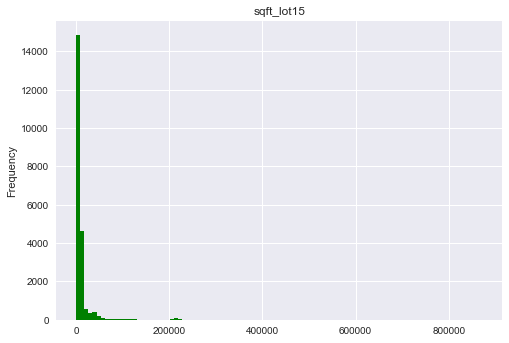

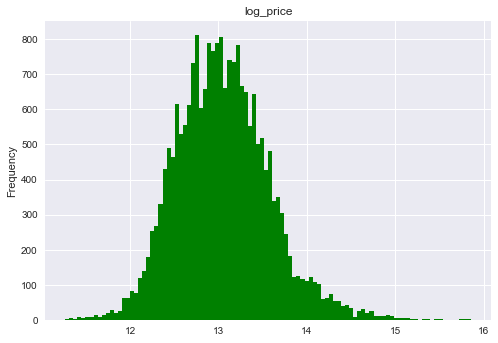

In [275]:
for col in df.loc[:,'bedrooms':'log_price']:
    df[col].plot(kind='hist',bins=100, color='green')
    plt.title(col)
    plt.show()
    
#     big long list of histograms

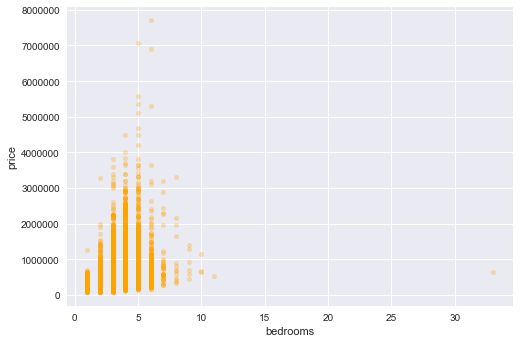

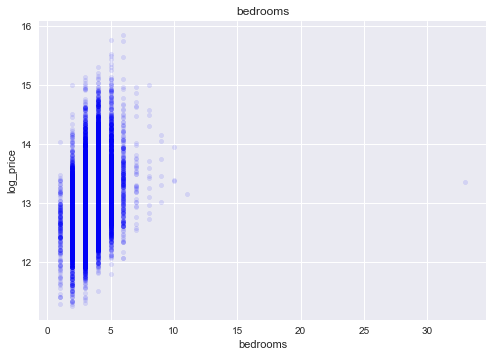

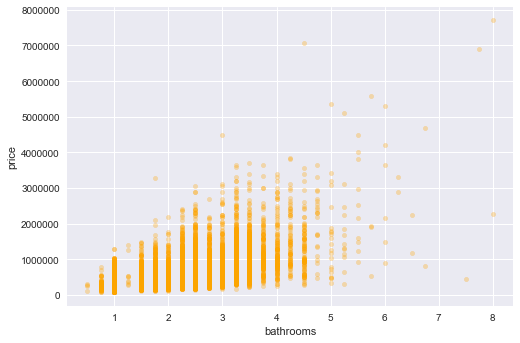

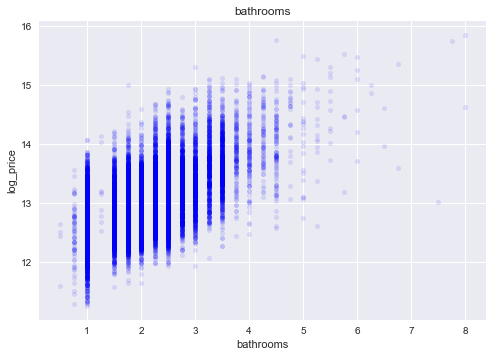

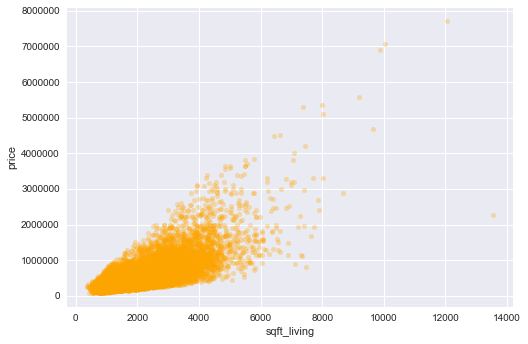

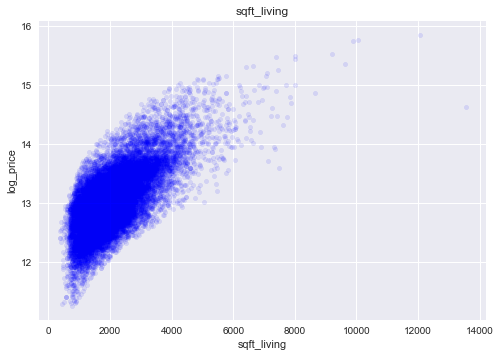

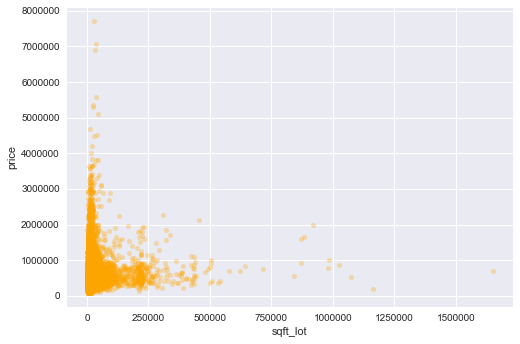

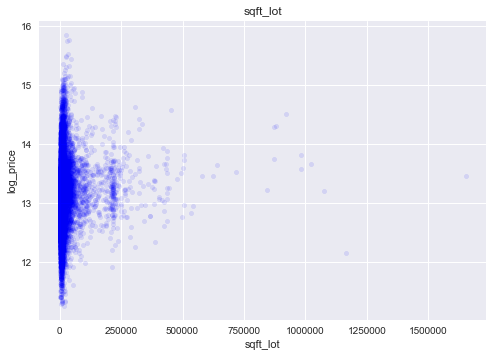

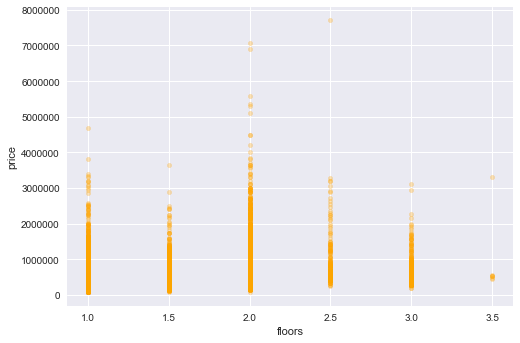

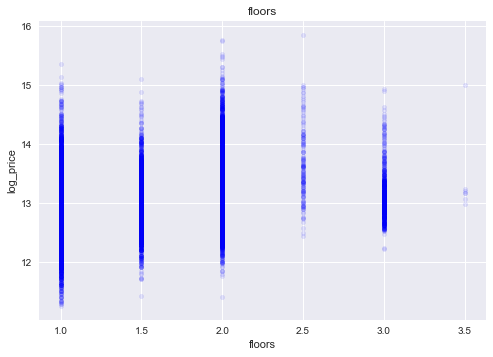

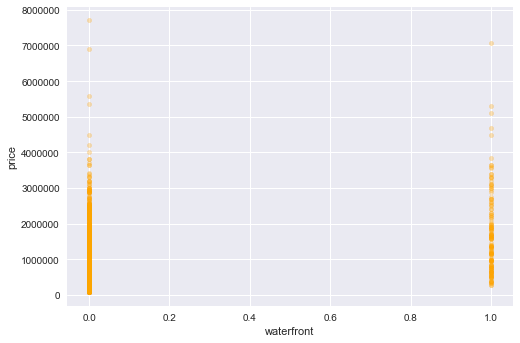

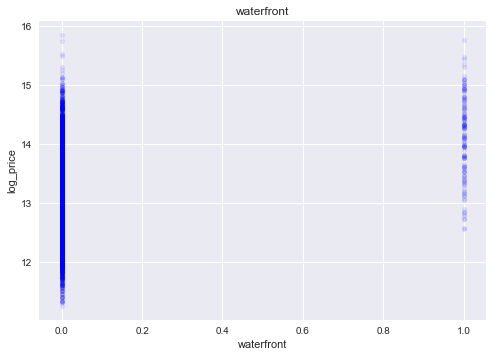

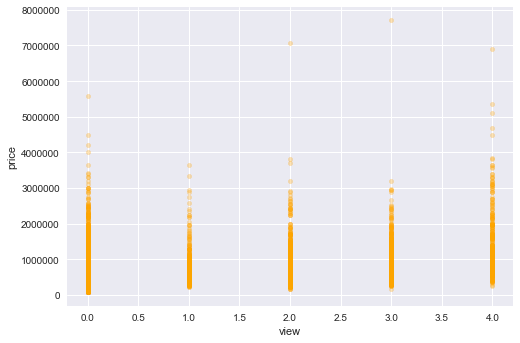

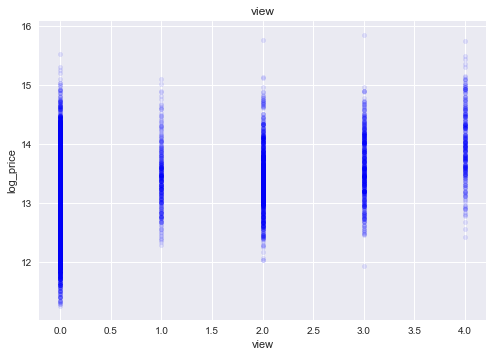

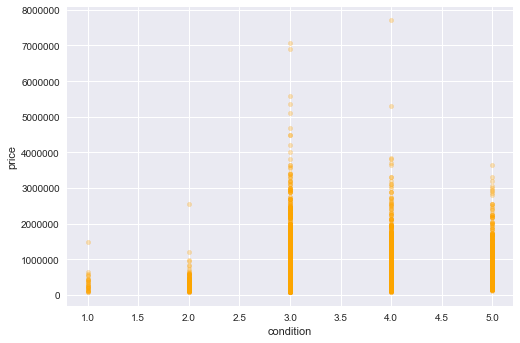

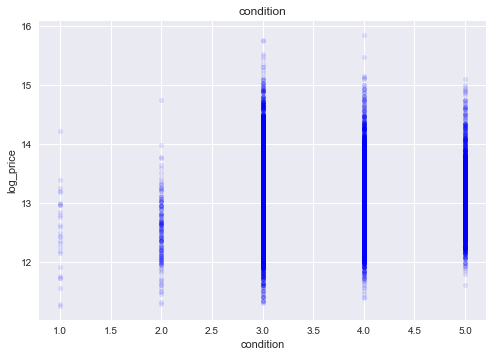

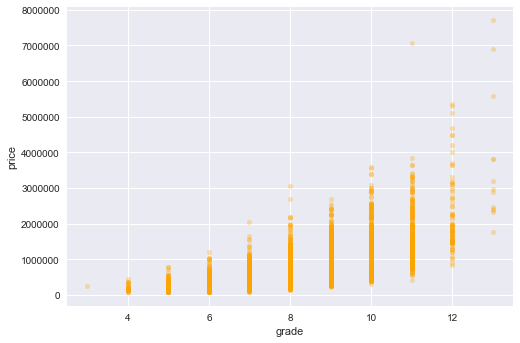

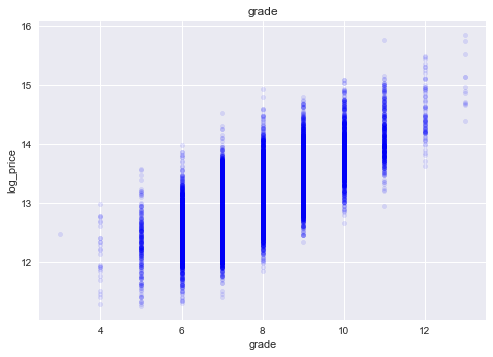

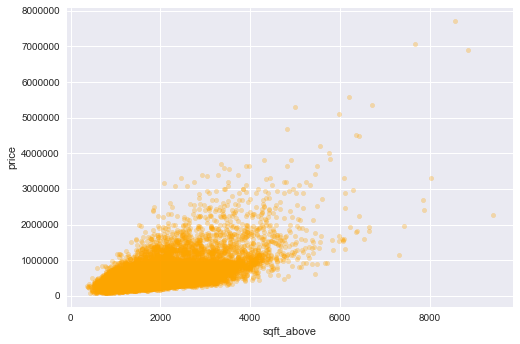

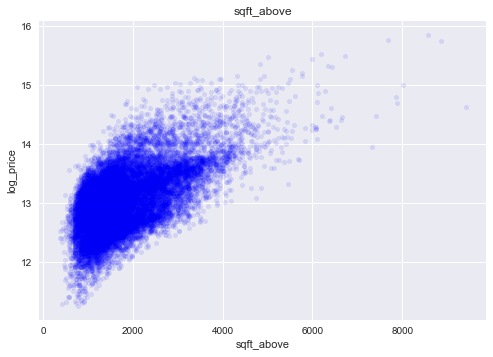

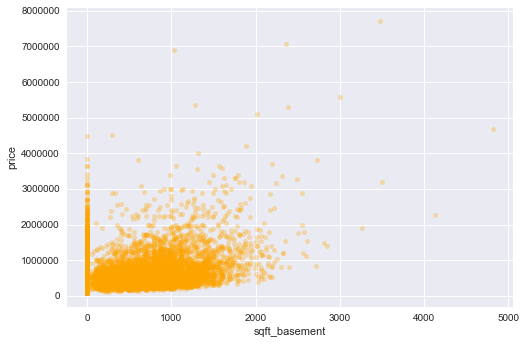

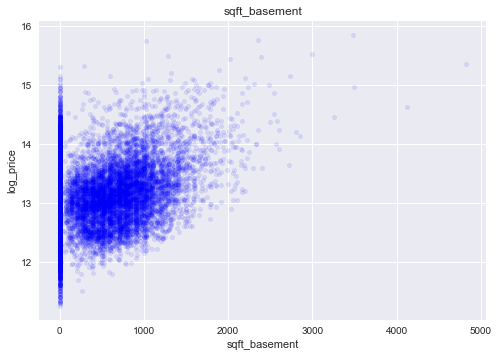

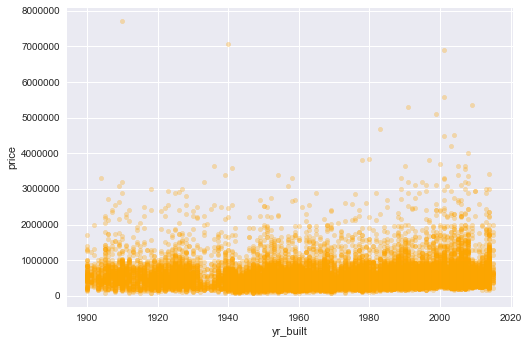

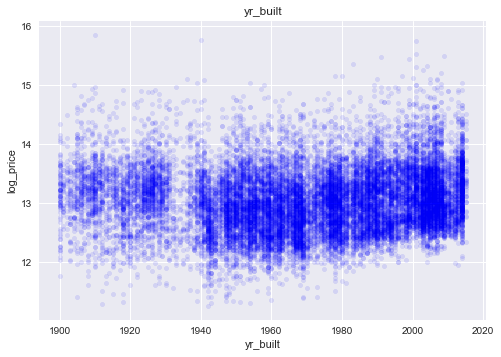

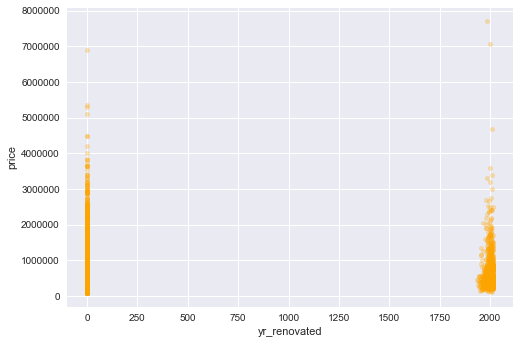

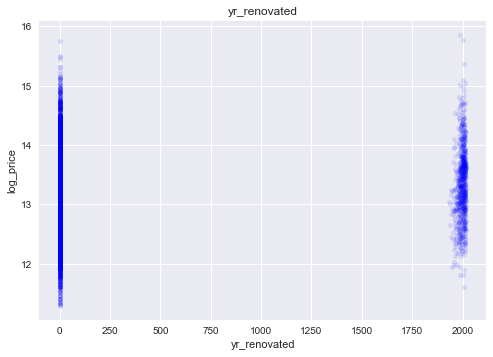

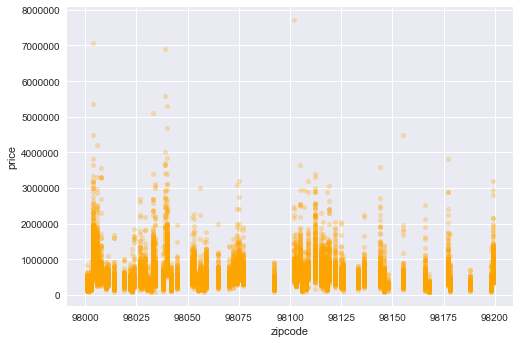

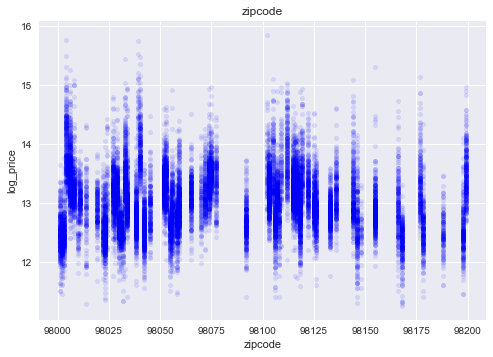

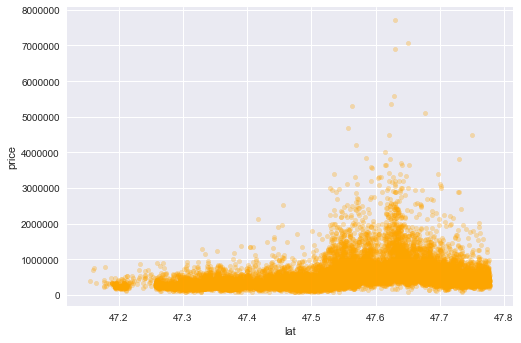

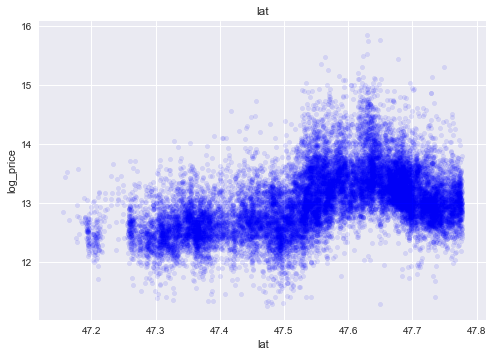

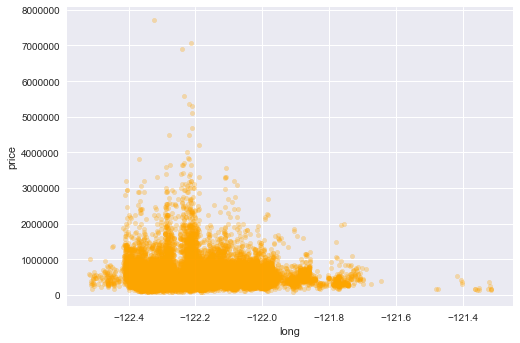

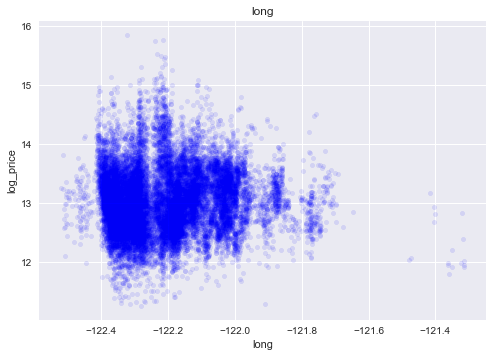

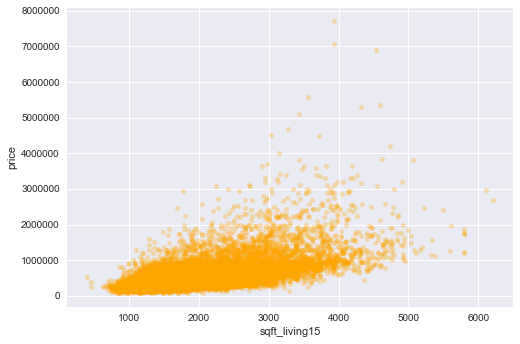

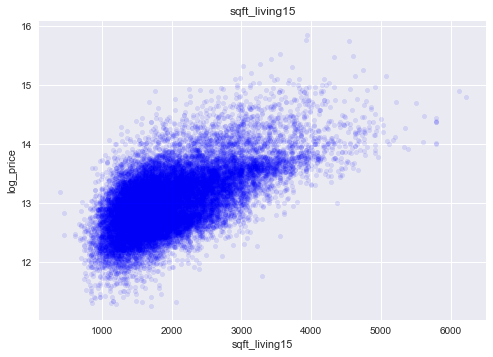

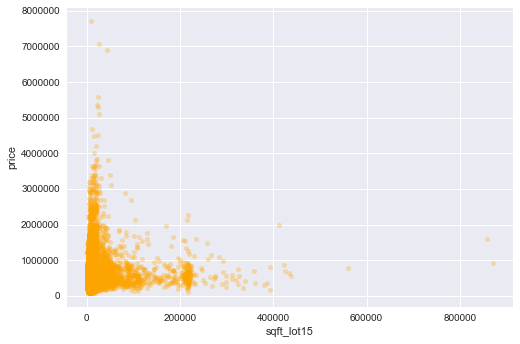

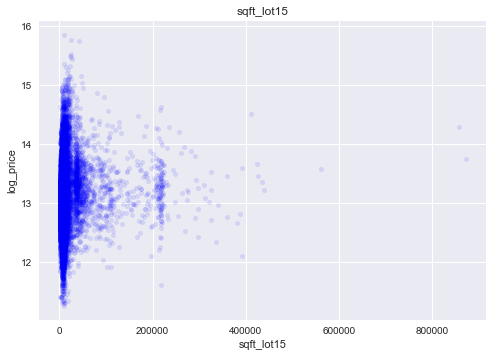

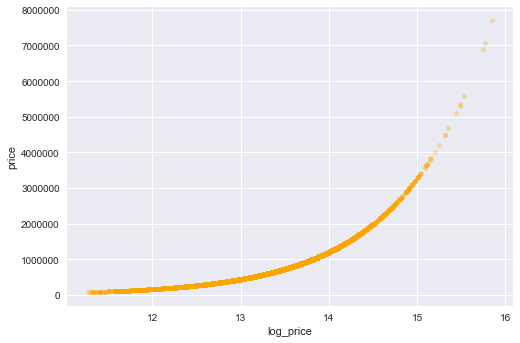

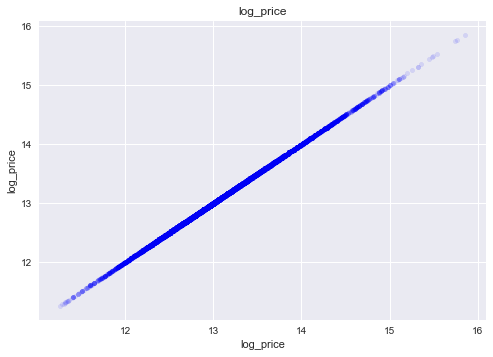

In [276]:
# for col in df.loc[:,'bedrooms':'log_price']:
#     df[col].plot(kind='hist',bins=100, color='green')
#     plt.title(col)
#     plt.show()
# df.plot.scatter('price', 'sqft_living', c='orange')


for col in df.loc[:,'bedrooms':'log_price']:
    df.plot.scatter(col, 'price', color='orange', alpha=0.3)
    df.plot.scatter(col, 'log_price', color='blue', alpha=0.1)
    plt.title(col)
    plt.show()
    
#     big long list of scatters for corrs

In [277]:
df.zipcode = df.zipcode.astype('str')

In [278]:
df.isna().sum()

id                    0
date                  0
price                 0
bedrooms              0
bathrooms             0
sqft_living           0
sqft_lot              0
floors                0
waterfront         2376
view                 63
condition             0
grade                 0
sqft_above            0
sqft_basement         0
yr_built              0
yr_renovated       3842
zipcode               0
lat                   0
long                  0
sqft_living15         0
sqft_lot15            0
log_price             0
sqft_living_log       0
dtype: int64

In [279]:
df.waterfront.fillna(0, inplace=True)

In [280]:
df.waterfront.unique()

array([0., 1.])

In [281]:
df.view.fillna(0,inplace=True)

In [282]:
df.view.unique()

array([0., 3., 4., 2., 1.])

In [283]:
df.view.value_counts()

0.0    19485
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [284]:
df.isna().sum()

id                    0
date                  0
price                 0
bedrooms              0
bathrooms             0
sqft_living           0
sqft_lot              0
floors                0
waterfront            0
view                  0
condition             0
grade                 0
sqft_above            0
sqft_basement         0
yr_built              0
yr_renovated       3842
zipcode               0
lat                   0
long                  0
sqft_living15         0
sqft_lot15            0
log_price             0
sqft_living_log       0
dtype: int64

In [285]:
df.yr_renovated.unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [286]:
df.yr_renovated.replace(0,np.nan,inplace=True)

In [287]:
df.yr_renovated.unique()

array([  nan, 1991., 2002., 2010., 1992., 2013., 1994., 1978., 2005.,
       2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990., 1988.,
       1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989., 2004.,
       1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971., 1979.,
       1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008., 1968.,
       2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955., 1982.,
       1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957., 1959.,
       1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [288]:
df.isna().sum()

id                     0
date                   0
price                  0
bedrooms               0
bathrooms              0
sqft_living            0
sqft_lot               0
floors                 0
waterfront             0
view                   0
condition              0
grade                  0
sqft_above             0
sqft_basement          0
yr_built               0
yr_renovated       20853
zipcode                0
lat                    0
long                   0
sqft_living15          0
sqft_lot15             0
log_price              0
sqft_living_log        0
dtype: int64

In [289]:
df.loc[df.yr_renovated != np.nan, 'yr_renovated'] = df.loc[df.yr_renovated != np.nan, 'yr_built']

In [290]:
df.isna().sum()

id                 0
date               0
price              0
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
floors             0
waterfront         0
view               0
condition          0
grade              0
sqft_above         0
sqft_basement      0
yr_built           0
yr_renovated       0
zipcode            0
lat                0
long               0
sqft_living15      0
sqft_lot15         0
log_price          0
sqft_living_log    0
dtype: int64

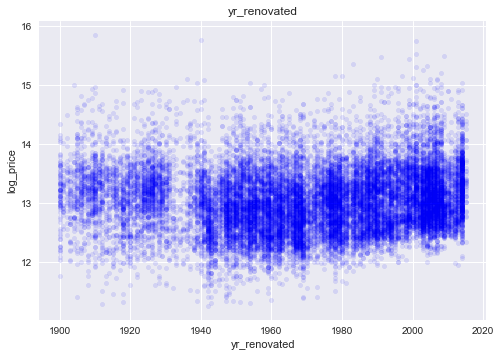

In [291]:
df.plot.scatter('yr_renovated', 'log_price', color='blue', alpha=0.1)
plt.title('yr_renovated')
plt.show()

In [292]:
df.corr().log_price

id                -0.003751
price              0.891745
bedrooms           0.343360
bathrooms          0.551249
sqft_living        0.695185
sqft_lot           0.100025
floors             0.310630
waterfront         0.170720
view               0.344653
condition          0.038918
grade              0.703720
sqft_above         0.601579
sqft_basement      0.313119
yr_built           0.080583
yr_renovated       0.080583
lat                0.448837
long               0.050862
sqft_living15      0.619326
sqft_lot15         0.092281
log_price          1.000000
sqft_living_log    0.674802
Name: log_price, dtype: float64

In [293]:
'''yr renovated still not very useful'''

'yr renovated still not very useful'

In [294]:
df_cont = df[['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']]

In [295]:
df_cat = df[['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long']]

In [296]:
df_cont.head()

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,221900.0,1180,5650,1180,0.0,1340,5650
1,538000.0,2570,7242,2170,400.0,1690,7639
2,180000.0,770,10000,770,0.0,2720,8062
3,604000.0,1960,5000,1050,910.0,1360,5000
4,510000.0,1680,8080,1680,0.0,1800,7503


In [297]:
df_cat.head()

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long
0,3,1.00,1.0,0.0,0.0,3,7,1955,1955,98178,47.5112,-122.257
1,3,2.25,2.0,0.0,0.0,3,7,1951,1951,98125,47.7210,-122.319
2,2,1.00,1.0,0.0,0.0,3,6,1933,1933,98028,47.7379,-122.233
3,4,3.00,1.0,0.0,0.0,5,7,1965,1965,98136,47.5208,-122.393
4,3,2.00,1.0,0.0,0.0,3,8,1987,1987,98074,47.6168,-122.045


In [298]:
df_cat.to_csv('categorical_kc_mk1')
df_cont.to_csv('continuous_kc_mk1')